Upper Confidence Bound

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing dataset

In [2]:
dataset = pd.read_csv('ads_ctr_optimisation.csv')

Implementing UCB

In [3]:
import math
N = 10000
d = 10
ads_selected = []

Step 1

In [4]:
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0

Step 2

In [5]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]

            # Confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        # Step 3
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

Visualising the results

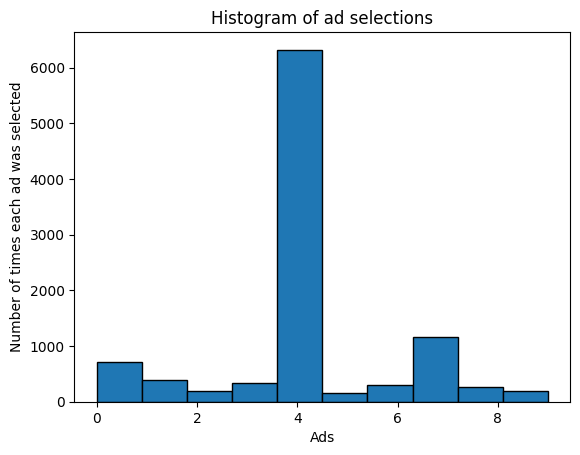

In [6]:
plt.hist(ads_selected, edgecolor = 'black')
plt.title('Histogram of ad selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()